In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

from dateutil.parser import parse
from datetime import timedelta
from tqdm import tqdm

In [5]:
data1 = pd.read_csv("data1.csv") #초반
data1.describe()

,Voltage(V),Current(A),Resistance(Ohm),Power(W)
count,270.000000,270.000000,270.000000,270.000000
mean,3.835594,0.000439,2.811833,0.002478
std,0.028272,0.003589,18.686990,0.016470
min,3.730800,0.000000,0.000000,0.000000
25%,3.818000,0.000000,0.000000,0.000000
50%,3.844900,0.000000,0.000000,0.000000
75%,3.857450,0.000000,0.000000,0.000000
max,3.867800,0.030100,127.662000,0.114000


In [6]:
data2 = pd.read_csv("data2.csv") #중반
data2.describe()

,Voltage(V),Current(A),Resistance(Ohm),Power(W)
count,166.000000,166.000000,166.000000,166.000000
mean,3.891724,0.001087,6421.010699,0.004060
std,0.032776,0.005561,52180.347360,0.020677
min,3.722200,0.000000,0.000000,0.000000
25%,3.897700,0.000000,0.000000,0.000000
50%,3.898400,0.000000,0.000000,0.000000
75%,3.898800,0.000000,0.000000,0.000000
max,3.899000,0.030100,647645.937000,0.112000


In [7]:
data3 = pd.read_csv("data3.csv") #후반
data3.describe()

,Voltage(V),Current(A),Resistance(Ohm),Power(W)
count,130.000000,130.000000,130.000000,130.000000
mean,3.881165,0.001150,18907.774915,0.004277
std,0.037032,0.005729,98630.459572,0.021309
min,3.695700,0.000000,0.000000,0.000000
25%,3.888300,0.000000,0.000000,0.000000
50%,3.889150,0.000000,0.000000,0.000000
75%,3.889500,0.000000,0.000000,0.000000
max,3.889900,0.030000,646036.437000,0.111000


In [10]:
data = pd.read_csv("Record File__0mA(29s)~30mA(1s)(통합).csv") #통합 데이터
data.describe()

,Voltage(V),Current(A),Resistance(Ohm),Power(W)
count,4.988486e+06,4.988486e+06,4.988486e+06,4.988486e+06
mean,3.889299e+00,9.340380e-04,1.300571e+04,3.475257e-03
std,3.141821e-02,5.146647e-03,5.870463e+04,1.871865e-02
min,1.680000e-02,-1.500000e-03,0.000000e+00,0.000000e+00
25%,3.888700e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.894900e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,3.899500e+00,0.000000e+00,1.219480e+02,0.000000e+00
max,3.907000e+00,1.399000e+00,6.489843e+05,1.340000e-01


In [11]:
data = data.iloc[:, :3] #.values

In [14]:
date_=[] #replace korean to english

for i in data['Time'].values:
    i = i.replace("오전", "AM")
    i = i.replace("오후", "PM")
    date_.append(i)

In [15]:
date__=[] #split blank

for i in date_:
    date__.append(i.split(" "))

In [16]:
date___=[] #switch index

for i in date__:
    tmp = i[1]
    i[1] = i[2]
    i[2] = tmp
    date___.append(i)

In [26]:
parsing_date=[]

for i in tqdm(date___):
    #print('parsing: ', i, "=", (" ").join(i))
    dt = parse((" ").join(i)) #list to string
    #print(dt)
    #print()
    parsing_date.append(dt)

100%|█████████████████████████████████████████████████████████████████████| 4988486/4988486 [07:54<00:00, 10520.87it/s]


계산을 해서 그거 파일의 차례대로 리스트 혹은 어레이에 저장해둔다.
그래프로 그려두고 그것으로 전압 회복 시간을 확인하는 것이 좋을 것.

1. 기준 전압 -> 시간
2. 통신 전압 -> 시간
3. 회복 전압 -> 시간
4. 전압 회복 시간 

In [ ]:
str(parsing_date[2000000] - parsing_date[0])

### 찾아야 하는 것들
1. 통신 직전의 전압 인덱스 
    - 전류가 0.020 < current (<= 0.035)인 인덱스의 전 인덱스
    ```
    comm = np.where(data['Current(A)'] > 0.020)[0] #통신
    # 0.020 초과인 인덱스
    ```
    
    - 전압 확인 (기준 전압)
    ```
        
    ```
    - 인덱스 확인
    ```
    criteria = comm - 1 #통신 직전 전압의 인덱스를 알기 위함
    ```
2. 통신 전압
    - 전류가 0.020 < current인 인덱스
    ```
    comm = np.where(data['Current(A)'] > 0.020)[0]
    ```
    - 전압 확인 (최저 전압 확인)
    ```
    comm = np.delete(comm, np.where(data['Voltage(V)'] < 2.000))
    ```
    - 인덱스 확인
    - 통신 전압이 기준 전압의 얼마만큼을 소비했는가
    ```
    #pre 기준 전압의 인덱스
    
    ```
3. 통신 후 전압
    - (기준 전압 - 현재 전압) * 100
    - 전압 회복률 
    - 회복 기준이 0.5인 곳이 회복 시간이라고 하자면 시간
    ```
    #시간과 전압, 전압 회복률 저장
    ```

In [121]:
comm_ = np.delete(np.where(data['Current(A)'] > 0.020)[0], np.where(data['Voltage(V)'] < 2.000))

In [122]:
comm

array([    269,     401,     403, ..., 4988274, 4988381, 4988383],
      dtype=int64)

In [123]:
comm = []
comm.append(comm_[0])

for idx in range(int(len(comm_)-1)):
#     print("index", idx, "i", comm_[idx])
#     print("index+1", idx+1, "i", comm_[idx+1])
    if comm_[idx]+1 != comm_[idx+1]:
#         print("index+1", idx+1, "i", comm_[idx+1])
#         print(comm)
        comm.append(comm_[idx+1])
#         print(comm)

In [130]:
np.array(comm)

array([    269,     401,     535, ..., 4988164, 4988274, 4988381],
      dtype=int64)

In [127]:
criteria = np.array(comm) - 1

In [128]:
criteria

array([    268,     400,     534, ..., 4988163, 4988273, 4988380],
      dtype=int64)

In [41]:
data['Voltage(V)'][comm[13]]

3.7942

In [35]:
data['Voltage(V)'][comm[5]-1]

3.8575

In [85]:
crit = 0.5

In [131]:
recovery_time=[]
recovery_rate=[]
recovery_voltage=[]

for idx, i in enumerate(tqdm(criteria)): #기준 전압
#     print(i)
    for j in range(int(len(data['Voltage(V)']))): #전압 회복률을 계산해야 함
#         print(j+i)
        if j+i == comm[idx+1]: #j+i(index)가 다음 기준 전압 인덱스일 때
            break
        rate = round(((data['Voltage(V)'][i] - data['Voltage(V)'][j+i+1]) * 100), 2)
        time = data['Time'][j+i]
        vol = data['Voltage(V)'][j+i]
        
        if rate >= crit: 
            recovery_rate.append(rate)
            recovery_time.append(time)
            recovery_voltage.append(vol)


100%|██████████████████████████████████████████████████████████████████████████▉| 59557/59558 [03:17<00:00, 301.02it/s]


IndexError: list index out of range

In [105]:
recovery_rate

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

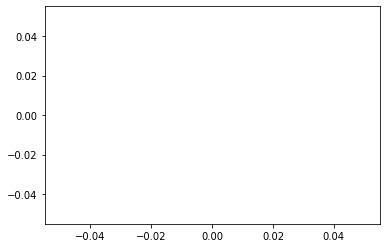

In [88]:
plt.plot(recovery_rate)